### 파이썬을 이용한  웹 데이터 수집(크롤링)

1. 문서 내용 읽어오기 urllib 패키지 
    -  urlopen() 접속 
    - read() 데이터 읽어오기
    - text 속성을 사용해서 데이터 읽어올 수도 있음    
      
    

2. 문서에서 원하는 내용 추출하기(파싱)  
 
 
#### BeautifulSoup 패키지 사용 - find()/findAll()

#### urllib 패키지 - url을 넘겨주면 데이터를 텍스트 형태로 반환(기본 내장 패키지)  


- urllib2, urllib3 다른 버전 사용
- requests 패키지를 사용할 수도 있음

In [5]:
import requests
# 파이썬 기본 패키지 : HTTP 요청을 보내는 모듈

In [8]:
url = 'http://www.tistory.com'
# requst 패키지의 get(url) 함수 사용 : urllib의 open()과 read()를 한 번에 진행
response=requests.get(url)
response
# URL 변수에 저장되어 있는 웹주소로 요청신호를 보냄
# 서버(tistory)는 해당 페이지의 소스코드를 클라이언트로 전송하면서 응답하게 됨
# response 변수에는 http://www.tistory.com의 소스코드(html)가 저장되어 있음

<Response [200]>

In [9]:
# 정상 응답인지 확인
response.status_code # 응답에대한 상태코드
# 200은 정상응답
# 400번대 코드 : 클라이언트의 요청이 잘못되었다의 의미(url주소가 틀렸거나 권한이 없는 페이지를 요청했거나...)
# 500번태 코드 : 클라이언트는 문법에 맞게 요청을 했는데 서버측에서 인증이 안되었거나, 서버가 망가졌거나의 상태

200

In [10]:
# 요청에 의해 전달된 코드 확인
# 응답객체.text 속성을 통해 확인
response.text
# 브라우저가 사이트에 요청해서 받은 결과 코드랑 동일한 코드가 문자열 형태로 반환됨

'\n\t<!doctype html>\n\t<html lang="ko">\n\t<head>\n\t\t<meta charset="utf-8">\n\t\t<meta property="og:url" content="https://www.tistory.com">\n\t\t<meta property="og:site_name" content="TISTORY">\n\t\t<meta property="og:title" content="TISTORY">\n\t\t<meta property="og:description" content="나를 표현하는 블로그를 만들어보세요.">\n\t\t<meta property="og:image" content="//t1.daumcdn.net/tistory_admin/static/images/openGraph/opengraph.png">\n\t\t<title>TISTORY</title>\n\t\t<link rel="shortcut icon" href="//t1.daumcdn.net/tistory_admin/static/top/favicon.ico">\n\t\t<link rel="apple-touch-icon" href="//t1.daumcdn.net/tistory_admin/static/images/openGraph/180x180.png">\n\t\t<link rel="apple-touch-icon" sizes="76x76" href="//t1.daumcdn.net/tistory_admin/static/images/openGraph/76x76.png">\n\t\t<link rel="apple-touch-icon" sizes="120x120" href="//t1.daumcdn.net/tistory_admin/static/images/openGraph/120x120.png">\n\t\t<link rel="apple-touch-icon" sizes="152x152" href="//t1.daumcdn.net/tistory_admin/static/ima

In [13]:
r=requests.get('https://www.google.co.kr') # 사이트 접속요청 후 응답
r
#<Response [200]> : 응답객체이고 정상응답받았다
r.text
len(r.text)
 #14377
# 반환된 소스의 일부분 추출
r.text[0:100]

'<!doctype html><html itemscope="" itemtype="http://schema.org/WebPage" lang="ko"><head><meta content'

In [15]:
url='http://www.naver.com'
res=requests.get(url)
res.status_code # 200
res.text
len(res.text)

200371

#### 파라미터 전달 방법
- 파라미터란? : 사이트의 문서를 요청할 때 서버로 전달되는 정보
- 함수의 파라미터 처럼 문서를 찾기위한 정보나 명령을 수행하기 위한 정보를 같이 전달하게 되는데 그 정보를 파라미터라고 함 
- 서버에 파라미터 전송방법
    - 파라미터 전송 방법은 url에 ? 뒤에 파라미터=값&파라미터2=값 으로 전송
        - 사이트에 따라서 잘못된 접속으로 인지하고 에러처리할 수 있음
    - 파라미터를 dict로 구성해서 get(params=dict)


- https://sports.news.naver.com/news?oid=477&aid=0000312064
- params = {'param1': 'value1', 'param2': 'value'}
- res = requests.get(URL, params=params)

In [21]:
url_base = "https://sports.news.naver.com/news" # 기본 url
param_url='https://sports.news.naver.com/news?oid=477&aid=0000312064'
 # 파라미터가 포함된 url

In [18]:
# 파라미터 전달 방식 1 : get방식
# site에 따라 접근 거부할 수도 있음
res1=requests.get(param_url)
res2=requests.get(url)
res1.status_code

200

In [22]:
# 파라미터 전달 방식 2 : params= dict사용
# oid=477&aid=0000312064 - oid는 숫자처리, aid는 문자열처리
param={'oid':477,'aid':'0000312064'}
res2=requests.get(url_base,params=param)
res2.status_code

200

#### urllib 패키지 사용한 소스 추출

In [26]:
from urllib.request import urlopen # 사이트에 요청 신호를 보내는 함수

In [35]:
url = 'http://www.naver.com'
html=urlopen(url)
html
#<http.client.HTTPResponse at 0x2a60cc87c70> : 상태코드와 소스코드가 있습니다.

In [36]:
# 응답객체에서 소스코드 읽어오기 - 응답객체.read()
# 한 번만 실행하고 두번이상 실행하면 비어있게 됨
rawtext=html.read()


<!doctype html>                          <html lang="ko" data-dark="false"> <head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" content="https://www.naver.com/"> <meta name="twitter:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta name="twitter:description" content="네이버 메
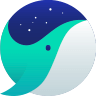
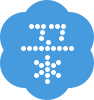

In [38]:
type(rawtext) 
bytes(rawtext)
print(rawtext.decode('utf8'))

#### 문서에서 원하는 내용 추출하기(파싱)  
- html 문서에서 원하는 내용 추출
    - 필요한 내용만 추출
    - BeautifulSoup 라이브러리 사용
        - 태그 형식으로 된 text를 파싱할 때 사용
    - find() / findAll() 등 함수 사용



#### BeautifulSoup
- import bs4
- 데이터를 추출하는데 필요한 기능이 들어 있는 라이브러리 (파싱 라이브러리)
- 외부 라이브러리 : 설치해야 함
- 주피터는 기본 패키지임(설치하지 않아도 됨)
- 파이참 설치방법
    - File/Settings
    - Project Interpreter에서 bs4 검색
    - [Install Package]


In [41]:
import bs4

In [42]:
url = 'http://www.naver.com'
html=urlopen(url)
html

<!DOCTYPE html>
<html data-dark="false" lang="ko">
 <head>
  <meta charset="utf-8"/>
  <title>
   NAVER
  </title>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=1190" name="viewport"/>
  <meta content="NAVER" name="apple-mobile-web-app-title">
   <meta content="index,nofollow" name="robots">
    <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="description">
     <meta content="네이버" property="og:title"/>
     <meta content="https://www.naver.com/" property="og:url"/>
     <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" property="og:image"/>
     <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" property="og:description">
      <meta content="summary" name="twitter:card"/>
      <meta content="" name="twitter:title"/>
      <meta content="https://www.naver.com/" name="twitter:url"/>
      <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" name="twitter:image"/
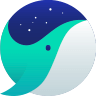
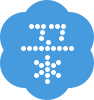

In [43]:
#######
# 응답객체인 html을 beautifulSoup(응답객체,파서기) 함수에 전달
# bs4 파싱객체를 반환
bs_obj=bs4.BeautifulSoup(html,'html.parser')
type(bs_obj) # bs4.BeautifulSoup
print(bs_obj.prettify())
# html 소스코드를 들여쓰기하여 계층적인 구조로 표현(가독성이 높다)

#### BeautifulSour 패키지의 파싱 함수
- find(태그,[{속성명:속성값}])
    - 지정한 태그 중 첫번째 만나는 태그만 추출 또는 지정한 태그 중 해당 속성과 속상값을 갖고있는 태그의 첫번째 태그
- findAll(태그,[{속성명:속성값}])
    - 지정한 태그 모두 찾아서 추출
    - 첫번째 이외의 태그를 추출할 때 사용
    - list 형태로 반환
- find_all(태그,[{속성명:속성값}])
    - findAll 함수와 동일

In [52]:
# test html
html_str='<html><div>hello</div></html>'

# html코드를 파싱 객체로 변환
bs_obj=bs4.BeautifulSoup(html_str,'html.parser')
print(type(bs_obj))
#<class 'bs4.BeautifulSoup'> bs4 객체 - 관련함수 사용 가능
print(bs_obj)
# html 태그로 추출

<class 'bs4.BeautifulSoup'>
<html><div>hello</div></html>


In [53]:
bs_obj.find('div')
# <div>hello</div> : 여는 div 태그부터 닫는 div 태그까지
bs_obj.find('div').text
# html코드에서 첫번째 만나는 div태그의 내부 문자열 반환

'hello'

In [57]:
html_str = """
<html>
    <body>
        <ul>
            <li>hello</li>
            <li>bye</li>
            <li>welcome</li>
        </ul>
    </body>
</html>
"""

In [58]:
# bs4객체생성
bs_obj=bs_obj=bs4.BeautifulSoup(html_str,'html.parser')

In [59]:
ul_t=bs_obj.find('ul')
ul_t
type(ul_t) # bs4.element.Tag

bs4.element.Tag

In [61]:
ul_t
ul_t.find('li')
# ul_t 객체 안에서 첫번째 만나는 li 태그를 반환

<li>hello</li>

In [64]:
uls=ul_t.findAll('li') # ul_t 객체 안에서 모든 li태그를 반환
# list형태로 반환

In [70]:
type(uls[2]) # tag객체
uls[2].text

# 반복문을 이용해서 모든원소의 text추출
for li in uls:
    print(li.text)

hello
bye
welcome


In [72]:
ul_t.text
# ul_t 태그 내부에 있는 모든 text를 문자열로 묶어서 반환

'\nhello\nbye\nwelcome\n'

In [73]:
ul_t.text.split('\n')

['', 'hello', 'bye', 'welcome', '']

In [81]:
html_str = """
<html>
    <body>
        <ul class="greet">
            <li>hello</li>
            <li>bye</li>
            <li>welcome</li>
        </ul>
        <ul class="reply">
            <li>ok</li>
            <li>no</li>
            <li>sure</li>
        </ul>
    </body>
</html>
"""

In [82]:
bs_obj=bs4.BeautifulSoup(html_str,'html.parser')

In [83]:
# 태그중에 특정 속성을 갖고 있는 태그를 추출
# ul 태그중 class 속성값이 greet인 태그를 추출
# 첫번째 ul 태그를 추출
bs_obj.find('ul')
# ul태그를 찾고 class 속성값이 greet인걸 확인 후에 반환
bs_obj.find('ul',{'class':'greet'})

<ul class="greet">
<li>hello</li>
<li>bye</li>
<li>welcome</li>
</ul>

In [84]:
# ul 태그중 class 속성값이 reply인 태그를 추출
bs_obj.findAll('ul')[1]
# ul 태그중 class 속성값이 reply인 첫번쨰 ul태그 반환
bs_obj.find('ul',{'class':'reply'})
# ul 태그중 class 속성값이 reply인 모든 ul태그 반환
bs_obj.findAll('ul',{'class':'reply'})
# 해당 태그가 여러개면 모두 반환

<ul class="reply">
<li>ok</li>
<li>no</li>
<li>sure</li>
</ul>

In [90]:
# bs_obj 객체의 모든 li태그 추출
bs_obj.find_all('li') # list로 반환
bs_obj.findAll('li') 

[<li>hello</li>,
 <li>bye</li>,
 <li>welcome</li>,
 <li>ok</li>,
 <li>no</li>,
 <li>sure</li>]

In [88]:
bs_obj.find_all('ul') # 두개의 ul 객체

[<ul class="greet">
 <li>hello</li>
 <li>bye</li>
 <li>welcome</li>
 </ul>,
 <ul class="reply">
 <li>ok</li>
 <li>no</li>
 <li>sure</li>
 </ul>]

In [92]:
# class 속성값이 greet인 ul태그 내의 모든 li태그 추출
bs_obj.find('ul').find_all('li') # 첫번째 ul태그에서 모든 li 추출
bs_obj.find_all('ul')[0].find_all('li') # 모든 ul태그중 첫번째에서 모든 li 추출
bs_obj.find('ul',{'class':'greet'}).find_all('li') # 첫번째 ul태그에서 class:greet인 모든 li추출
bs_obj.find_all('ul',{'class':'greet'}) # 모든 ul태그에서 class:greet인 태그 추출

[<ul class="greet">
 <li>hello</li>
 <li>bye</li>
 <li>welcome</li>
 </ul>]

In [96]:
html_str = """
<html>
    <body>
        <h1 id='title'>Hello Python</h1>
        <p id="crawling">웹 크롤링</p>
        <p id="parsing">파싱</p>
    </body>
</html>"""

In [97]:
bs_obj=bs4.BeautifulSoup(html_str,'html.parser')

In [100]:
# h1태그 중 id가 title인 태그 추출
bs_obj.find('h1',{'id':'title'})

<h1 id="title">Hello Python</h1>

In [103]:
# p태그 중 id가 parsing인 태그 추출
bs_obj.find('p',{'id':'parsing'})

<p id="parsing">파싱</p>

#### bs4 형제 노드 찾기

In [104]:

html_str = """
<html>
    <body>
        <h1>파이썬 프로그래밍</h1>
        <p>웹 페이지 분석</p><p>크롤링</p><p>파싱</p>        
    </body>
</html>
"""


In [105]:
bs_obj=bs4.BeautifulSoup(html_str,'html.parser')

In [106]:
bs_obj.find('p') # html 문서에서 첫번째 나타나는 p태그

<p>웹 페이지 분석</p>

In [107]:
bs_obj.find_all('p')

[<p>웹 페이지 분석</p>, <p>크롤링</p>, <p>파싱</p>]

In [109]:
p1=bs_obj.find('p')
p1.next_sibling # 첫번째 p태그를 기준으로 다음 p태그를 반환

<p>크롤링</p>

In [110]:
p1.next_sibling.next_sibling

<p>파싱</p>

####  속성값 추출하기
#### a 태그의 href 속성

In [111]:
html_str = """
<html>
    <body>
        <ul class="ko">
            <li><a href="https://www.naver.com/">네이버</a></li>
            <li><a href="https://www.daum.net/">다음</a></li>
        </ul>
        <ul class="sns">
            <li><a href="https://www.goole.com/">구글</a></li>
            <li><a href="https://www.facebook.net/">페이스북</a></li>
        </ul>
    </body>
</html>
"""

In [112]:
bs_obj=bs4.BeautifulSoup(html_str,'html.parser')

In [114]:
bs_obj.find_all('li')
bs_obj.find_all('a')

[<a href="https://www.naver.com/">네이버</a>,
 <a href="https://www.daum.net/">다음</a>,
 <a href="https://www.goole.com/">구글</a>,
 <a href="https://www.facebook.net/">페이스북</a>]

In [116]:
# 태그의 속성값을 추출
# 태그객체['속성명']
bs_obj.find_all('a')[0]['href']

'https://www.naver.com/'

In [117]:
bs_obj.find_all('a')[0].text

'네이버'

In [122]:
hrefs=[]
names=[]
for a in bs_obj.find_all('a'):
    names.append(a.text)
    hrefs.append(a['href'])

In [123]:
names

['네이버', '다음', '구글', '페이스북']

In [120]:
hrefs

['https://www.naver.com/',
 'https://www.daum.net/',
 'https://www.goole.com/',
 'https://www.facebook.net/']

In [126]:
import pandas as pd
pd.DataFrame({'site명': names,
            'siteURL':hrefs})

,site명,siteURL
0,네이버,https://www.naver.com/
1,다음,https://www.daum.net/
2,구글,https://www.goole.com/
3,페이스북,https://www.facebook.net/


In [131]:
import bs4
html_str = """
<html>
   <body>
    	<div id="wrap">
        	<div id="mainMenuBox">                	
                <ul>  
                    <li><a href="#">패션잡화</a></li>    
                    <li><a href="#">주방용품</a></li>                     	          
                    <li><a href="#">생활건강</a></li>
                    <li><a href="#">DIY가구</a></li>
                </ul>
            </div>
        	<div>
            	<table>
                	<tr><td><img src="shoes1.jpg"></td>
                    	  <td><img src="shoes2.jpg"></td>
                    	  <td><img src="shoes3.jpg"></td></tr>
                    <tr id="prdName"><td>솔로이스트<br>걸리쉬 리본단화</td>
                    	  <td>맥컬린<br>그레이가보시스트랩 펌프스</td>
                          <td>맥컬린<br>섹슈얼인사이드펌프스</td></tr>
                    <tr id="price"><td>100,000원</td><td>200,000원</td><td>120,000원</td></tr>
                </table>
            </div>
            <div id="out_box">
            	<div class="box">
                	<h4>공지사항</h4>
                    <hr>
                    <a href="#">[배송] : 무표배송 변경 안내 18.10.20</a><br>
                    <a href="#">[전시] : DIY 가구 전시 안내 18.10.31</a><br>
                    <a href="#">[판매] : 11월 특가 상품 안내 18.11.05</a>                               
                </div>
                <div class="box">
                	<h4>커뮤니티</h4>
                    <hr>
                    <a href="#">[레시피] : 살 안찌는 야식 만들기</a><br>
                    <a href="#">[가구] : 헌집 새집 베스트 가구</a><br>
                    <a href="#">[후기] : 배송이 잘못 됐어요 ㅠㅠ</a><br>
                 </div>
            </div>            
        </div>
    </body>
</html>"""

In [132]:
# bs 객체 생성
bs_obj=bs4.BeautifulSoup(html_str,'html.parser')

In [133]:
# 모든 a태그
bs_obj.findAll('a')

[<a href="#">패션잡화</a>,
 <a href="#">주방용품</a>,
 <a href="#">생활건강</a>,
 <a href="#">DIY가구</a>,
 <a href="#">[배송] : 무표배송 변경 안내 18.10.20</a>,
 <a href="#">[전시] : DIY 가구 전시 안내 18.10.31</a>,
 <a href="#">[판매] : 11월 특가 상품 안내 18.11.05</a>,
 <a href="#">[레시피] : 살 안찌는 야식 만들기</a>,
 <a href="#">[가구] : 헌집 새집 베스트 가구</a>,
 <a href="#">[후기] : 배송이 잘못 됐어요 ㅠㅠ</a>]

In [134]:
# selector : select(태그) 함수에 인수로 전달
# 해당 태그를 모두 찾아서 list로 반환
bs_obj.select('a')

[<a href="#">패션잡화</a>,
 <a href="#">주방용품</a>,
 <a href="#">생활건강</a>,
 <a href="#">DIY가구</a>,
 <a href="#">[배송] : 무표배송 변경 안내 18.10.20</a>,
 <a href="#">[전시] : DIY 가구 전시 안내 18.10.31</a>,
 <a href="#">[판매] : 11월 특가 상품 안내 18.11.05</a>,
 <a href="#">[레시피] : 살 안찌는 야식 만들기</a>,
 <a href="#">[가구] : 헌집 새집 베스트 가구</a>,
 <a href="#">[후기] : 배송이 잘못 됐어요 ㅠㅠ</a>]

In [136]:
# id 선택자 : #을 활용
bs_obj.select('div #mainMenuBox') # 리스트로 반환
bs_obj.select('#mainMenuBox')

[<div id="mainMenuBox">
 <ul>
 <li><a href="#">패션잡화</a></li>
 <li><a href="#">주방용품</a></li>
 <li><a href="#">생활건강</a></li>
 <li><a href="#">DIY가구</a></li>
 </ul>
 </div>]

In [140]:
bs_obj.select('#mainMenuBox ul')
bs_obj.select('#mainMenuBox > ul') #  ul이 자식태그이므로 리스트 출력

[<ul>
 <li><a href="#">패션잡화</a></li>
 <li><a href="#">주방용품</a></li>
 <li><a href="#">생활건강</a></li>
 <li><a href="#">DIY가구</a></li>
 </ul>]

In [141]:
bs_obj.select('#mainMenuBox li') # 자손태그 mainmenubox > ul > li
bs_obj.select('#mainMenuBox > li') # li가 자식태그가 아니므로 빈리스트 출력

[]

In [142]:
# id가 wrap인 태그의 모든 자식 div 태그
bs_obj.select('#wrap > div')
len(bs_obj.select('#wrap > div'))

3

In [143]:
bs_obj.select('#wrap div')
len(bs_obj.select('#wrap div'))

5

In [144]:
# 클래스 선택자 (.클래스명) 이용
# 클래스 속성값은 중복될 수 있음
bs_obj.select('.box') # 클래스 속성값이 box인 태그 모두를 추출

[<div class="box">
 <h4>공지사항</h4>
 <hr/>
 <a href="#">[배송] : 무표배송 변경 안내 18.10.20</a><br/>
 <a href="#">[전시] : DIY 가구 전시 안내 18.10.31</a><br/>
 <a href="#">[판매] : 11월 특가 상품 안내 18.11.05</a>
 </div>,
 <div class="box">
 <h4>커뮤니티</h4>
 <hr/>
 <a href="#">[레시피] : 살 안찌는 야식 만들기</a><br/>
 <a href="#">[가구] : 헌집 새집 베스트 가구</a><br/>
 <a href="#">[후기] : 배송이 잘못 됐어요 ㅠㅠ</a><br/>
 </div>]

In [148]:
len(bs_obj.select('.box'))
# 클래스 속성값이 box인 태그 중 두번째 태그의 모든 a태그를 추출
bs_obj.select('.box')[1].select('a')
# 클래스 속성값이 box인 태그 중 두번째 태그의 모든 a중 첫번째태그를 추출
bs_obj.select('.box')[1].select('a')[0]

<a href="#">[레시피] : 살 안찌는 야식 만들기</a>

In [149]:
bs_obj.select('.box')[0].select('a')[0].text

'[배송] : 무표배송 변경 안내 18.10.20'

#### 웹 크롤링 시 주의 사항
    - 웹 사이트는 언제든지 변경 될 수 있기 때문에 지금 실행하는 코드가 실행되지 않을 수 있다

bs_obj.select('.box')